In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
import corrLib
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from corrLib import density_fluctuation
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib as mpl
import pandas as pd

#### Figure 4 - what drives concentration fluctuations?
* concentration field $c$
* velocity field $v$
* velocity divergence $\nabla \cdot v$
* source field $\nabla \cdot (c\boldsymbol{n})$
* another source field $\nabla \cdot (c\boldsymbol{v})$

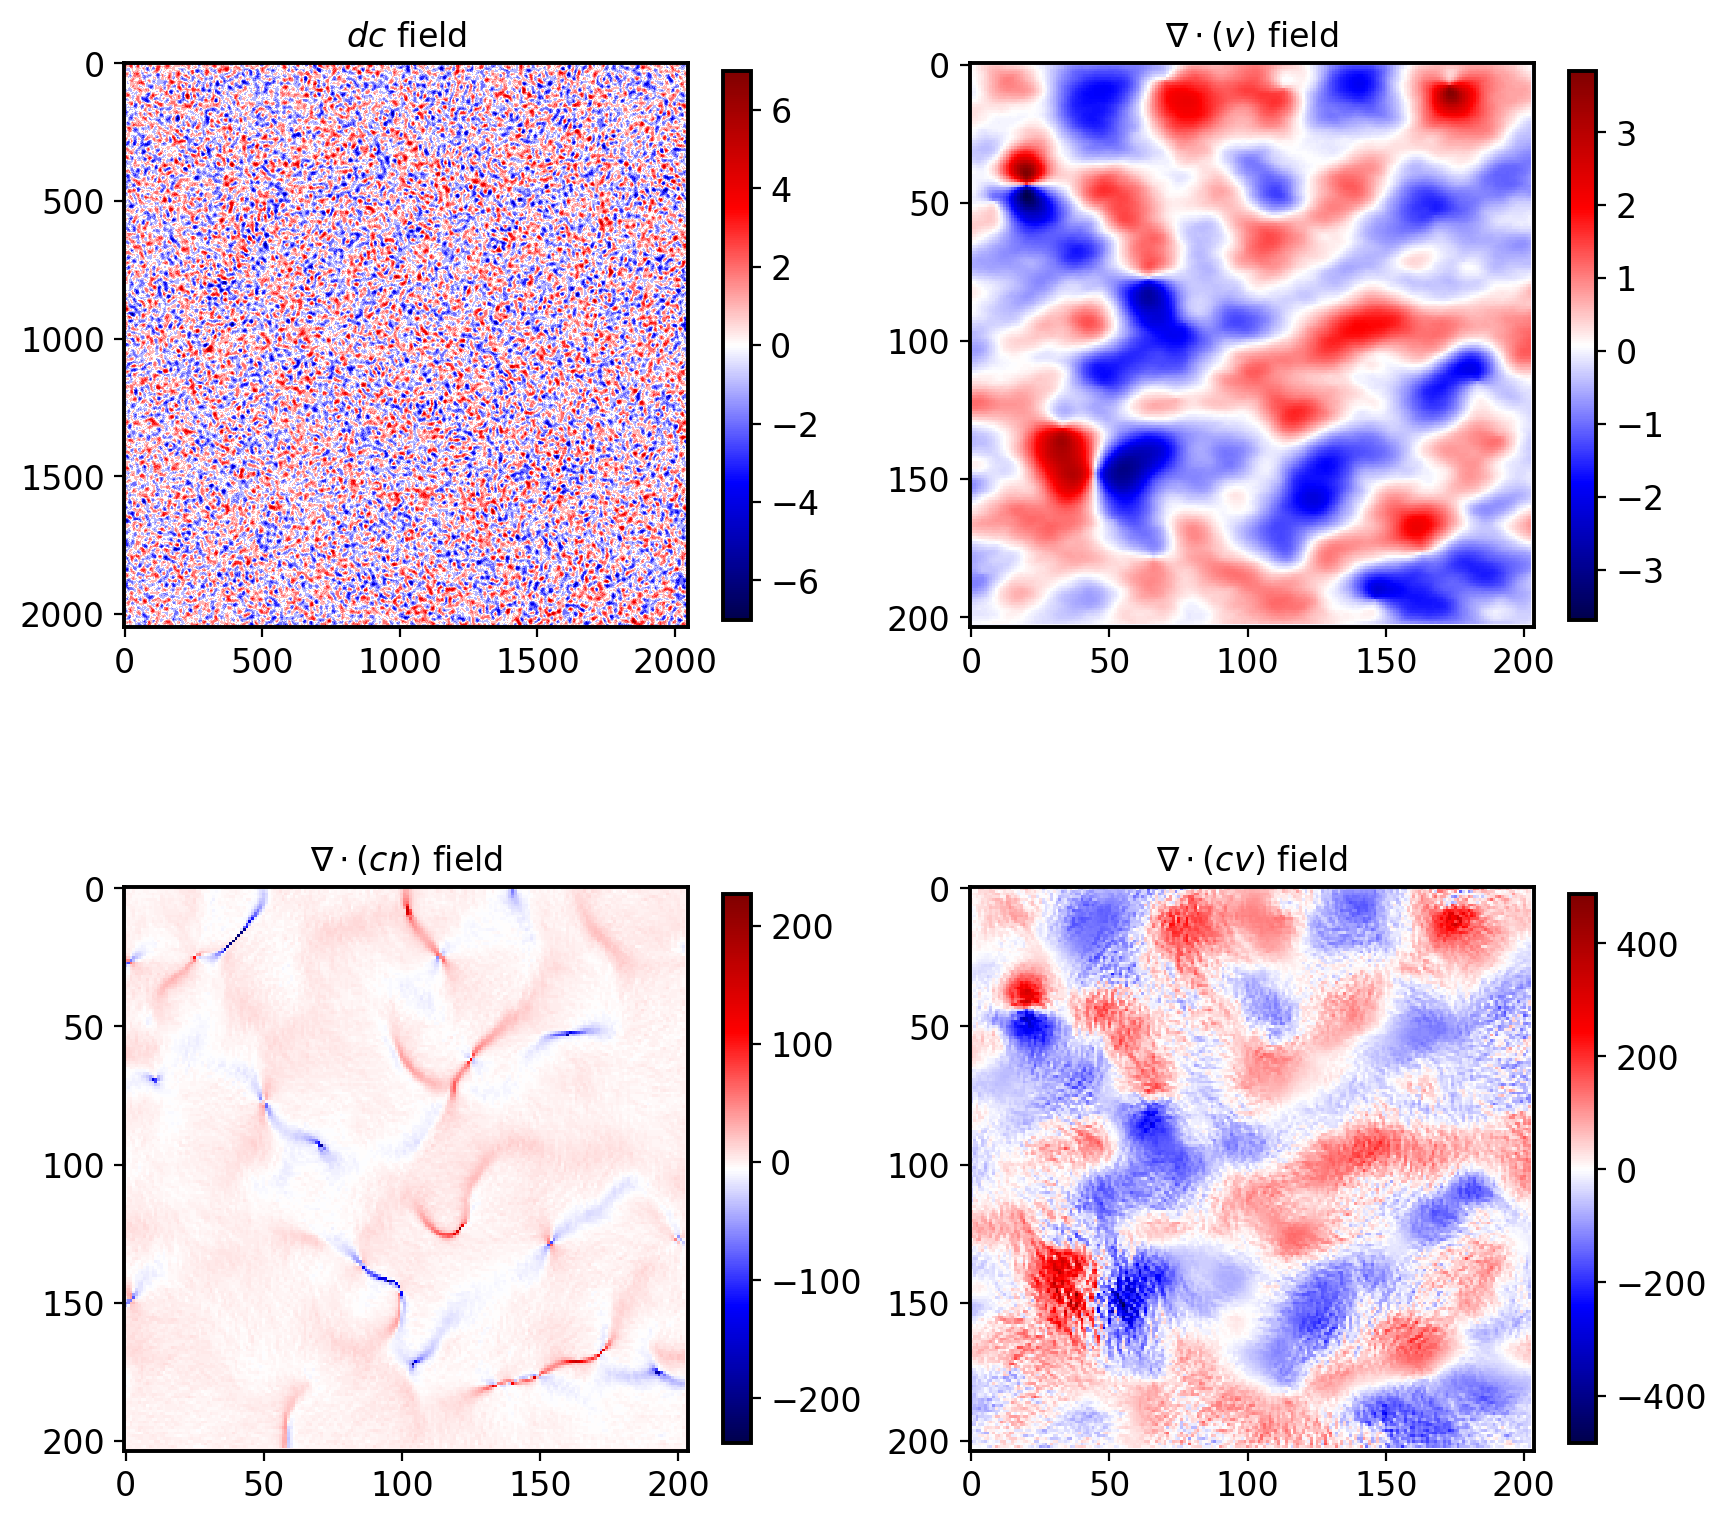

In [5]:
Dir = r'D:\Wei\Dynamics_raw\piv_result_10\80\900-901.csv'
img_folder = r'D:\Wei\Dynamics_raw\100'
dc_folder = r'D:\Wei\Dynamics_raw\80_diff'
pivData = pd.read_csv(Dir)
folder, file = os.path.split(Dir)
name_ind = file.find('-')
name = file[0: name_ind]
imgDir = os.path.join(img_folder, name + '.tif')
img = io.imread(imgDir)
c, v, divcn, divcv, divv = corrLib.div_field_2(img, pivData, 10, 10)
dc = np.load(os.path.join(dc_folder, name + '.npy'))
# Plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=200)
ax[0, 0].imshow(dc, cmap='seismic')
ax[0, 0].set_title('$dc$ field')
ax[0, 1].imshow(divv, cmap='seismic')
ax[0, 1].set_title('$\\nabla\cdot(v)$ field')
ax[1, 0].imshow(divcn, cmap='seismic')
ax[1, 0].set_title('$\\nabla\cdot(cn)$ field')
ax[1, 1].imshow(divcv, cmap='seismic')
ax[1, 1].set_title('$\\nabla\cdot(cv)$ field')

normdc = mpl.colors.Normalize(vmin=dc.min(), vmax=dc.max())
normv = mpl.colors.Normalize(vmin=divv.min(), vmax=divv.max())
normcv = mpl.colors.Normalize(vmin=divcv.min(), vmax=divcv.max())
normcn = mpl.colors.Normalize(vmin=divcn.min(), vmax=divcn.max())

plt.colorbar(mpl.cm.ScalarMappable(norm=normdc, cmap='seismic'), ax=ax[0, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normv, cmap='seismic'), ax=ax[0, 1], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcn, cmap='seismic'), ax=ax[1, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcv, cmap='seismic'), ax=ax[1, 1], shrink=0.8, drawedges=False)